In [6]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [7]:
# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

In [8]:
# Split into training and validation sets
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42)

In [9]:
def create_model():
    model = models.Sequential()
    
    # First Convolutional Layer
    model.add(layers.Conv2D(32, (3, 3), input_shape=(28, 28, 1)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    model.add(layers.Conv2D(64, (3, 3)))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Fully Connected Layer
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.BatchNormalization())
    model.add(layers.Activation('relu'))

    # Output Layer
    model.add(layers.Dense(10, activation='softmax'))
    
    return model


In [13]:
# Define batch sizes to test
batch_sizes = [32, 64, 128, 256]

# Results dictionary to store performance for each batch size
results = {'batch_size': [], 'val_loss': [], 'val_accuracy': []}


Training with batch size: 32
Batch Size: 32, Validation Loss: 0.03776295855641365, Validation Accuracy: 0.9901666641235352
Training with batch size: 64
Batch Size: 64, Validation Loss: 0.03439602628350258, Validation Accuracy: 0.9904999732971191
Training with batch size: 128
Batch Size: 128, Validation Loss: 0.03398185595870018, Validation Accuracy: 0.9897500276565552
Training with batch size: 256
Batch Size: 256, Validation Loss: 0.04653703793883324, Validation Accuracy: 0.9865000247955322


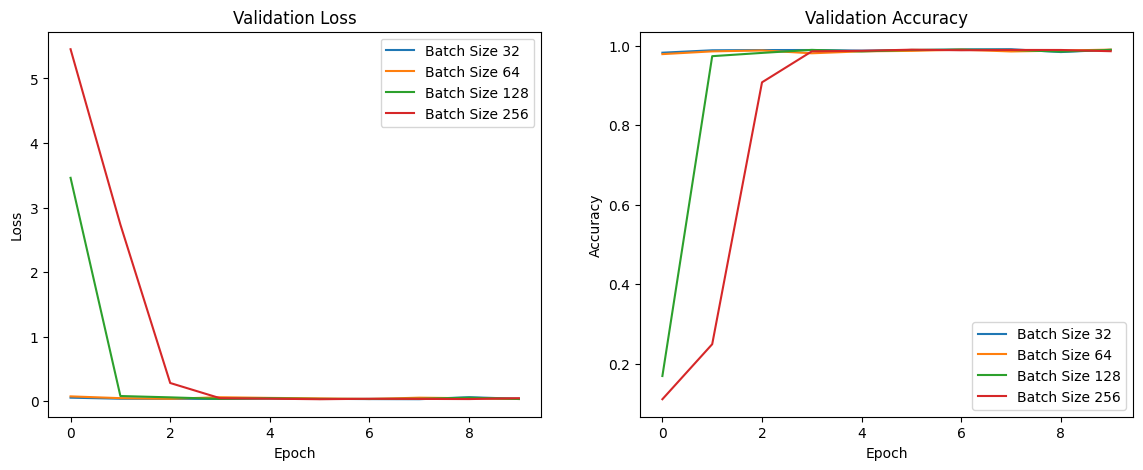

In [14]:

# Initialize plots
plt.figure(figsize=(14, 5))

# Loop through each batch size
for batch_size in batch_sizes:
    print(f"Training with batch size: {batch_size}")
    
    # Create the model
    model = create_model()
    
    # Compile the model
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    
    # Train the model
    history = model.fit(x_train, y_train, epochs=10, batch_size=batch_size, validation_data=(x_val, y_val), verbose=0)
    
    # Evaluate the model
    val_loss, val_accuracy = model.evaluate(x_val, y_val, verbose=0)
    
    # Store results
    results['batch_size'].append(batch_size)
    results['val_loss'].append(val_loss)
    results['val_accuracy'].append(val_accuracy)

    print(f'Batch Size: {batch_size}, Validation Loss: {val_loss}, Validation Accuracy: {val_accuracy}')
    
    # Plot Validation Loss
    plt.subplot(1, 2, 1)
    plt.plot(history.history['val_loss'], label=f'Batch Size {batch_size}')
    plt.title('Validation Loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    
    # Plot Validation Accuracy
    plt.subplot(1, 2, 2)
    plt.plot(history.history['val_accuracy'], label=f'Batch Size {batch_size}')
    plt.title('Validation Accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')

# Add legends to the plots
plt.subplot(1, 2, 1)
plt.legend()

plt.subplot(1, 2, 2)
plt.legend()

# Show the plots
plt.show()